### 1.引入依赖
### 2.读取数据
### 3.初步分析数据
### 4.数据分析，清洗数据
### 5.可视化输出
### 6.建模、预测
### 7.模型评估、再训练、调优

## 1.引入依赖

In [1]:
import pandas as pd
import pandas_profiling
from pathlib import Path

# 可视化
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 机器学习
from sklearn.model_selection import train_test_split
# 决策树
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
# 引入逻辑回归算法
from sklearn.linear_model import LinearRegression, LogisticRegression
# 引入朴素贝叶斯算法
from sklearn.naive_bayes import GaussianNB

In [2]:
import warnings
warnings.filterwarnings("ignore")  # 忽略版本问题

## 2.读取数据

In [3]:
df = pd.read_csv('online_shoppers_intention.csv')

Online Shoppers Purchasing Intention Dataset The data is collected from an online shopping platform. Each instance is a session of a user on the platform. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period. The dataset has the data of 12,330 sessions and 84.5% were negative class samples that did not end up with a profit (nothing bought). The dataset consists of 10 numerical and 8 categorical features. The revenue is used as the class label.

网上购物者购买意愿数据集该数据来自一个网上购物平台。每个实例都是平台上用户的会话。数据集的形成使得每个会话在1年的时间段内属于不同的用户，以避免出现特定活动、特殊日期、用户配置文件或时段的趋势。这个数据集有12330个会话的数据，84.5%是负类样本，最终没有盈利（什么也没买）。数据集由10个数字特征和8个分类特征组成。收入被用作类标签。

Instructions: 
- You should formulate a model to predict the revenue class using the features given. 
- You have the freedom to use any method or techniques to analyze the data, train models and evaluate the results. But you should only use standard python libraries + scipy + pandas tools. No third-party libraries are allowed. 
- You must deliver your project in the form of a jupyter notebook 
- Jupyter notebooks are all about telling a story using the data. So make your notebook that way, present everything nicely and have a good flow.
- We will not mark you on the final accuracy you get. We will mark you on how well you explain the decisions you have made in every stage of your project, reasoning behind your decisions and proper data representation, evaluation and analyzing methods. All of these must be shown within the notebook itself. 
- Make sure you attend labs and complete assignments, that will help you a lot.

说明：
- 您应该使用给定的特性来建立一个模型来预测收入类别。
- 您可以自由使用任何方法或技术来分析数据、训练模型和评估结果。但是您应该只使用标准的python库+scipy+pandas工具。不允许使用第三方库。
- 你必须以jupyter笔记本的形式交付你的项目
- Jupyter笔记本都是用数据来讲述故事。所以，把你的笔记本做成这样，把所有的东西都很好地呈现出来，并且有一个很好的流程。
- 我们不会在你最终的准确度上给你打分。我们将根据您在项目的每个阶段对您所做决策的解释程度、决策背后的推理以及正确的数据表示、评估和分析方法对您进行评分。所有这些都必须显示在笔记本内。
- 一定要参加实验并完成作业，这对你有很大帮助。

| 列名                     | 描述                                                         |
| ------------------------ | ------------------------------------------------------------ |
| Administrative           | 访问管理页的次数                                             |
| Administrative Duration  | 在管理页面上花费的总时间                                     |
| Informational            | 访问信息页的次数                                             |
| Informational Duration   | 在信息页上花费的总时间                                       |
| Product-Related          | 访问产品相关页面的次数                                       |
| Product-Related Duration | 花费在产品相关页面上的总时间                                 |
| Bounce Rate              | 从该页面进入网站然后离开的访问者百分比                       |
| Exit Rate                | 特定网页的功能是按该网页的所有网页浏览量计算的，即会话中最后一个网页的百分比。 |
| Page Value               | 用户在完成电子商务交易之前访问的网页的平均值。               |
| Special Day              | 网站访问时间与某一特定日期（如母亲节、情人节）的接近程度。此属性的值是通过考虑电子商务的动态（如订单日期和交货日期之间的持续时间）来确定的。<br/>例如，对于情人节，此值在2月2日和2月12日之间取一个非零值，除非它接近另一个特殊的日子，否则在该日期之前和之后为零，而它的最大值在2月8日为1。 |
| Month                    | 月                                                           |
| operating system         | 操作系统                                                     |
| browser                  | 浏览器                                                       |
| region                   | 区域                                                         |
| traffic type             | 交通类型                                                     |
| visitor type             | 返回或新访客                                                 |
| weekend                  | 一个布尔值，指示访问日期是否为周末                           |
|                          |                                                              |

## 3.初步分析数据

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
# 查看Series对象的唯一值和计数
not_number_series1 = df['Month'].value_counts(dropna=False)
not_number_series2 = df['VisitorType'].value_counts(dropna=False)
not_number_series3 = df['Weekend'].value_counts(dropna=False)
not_number_series4 = df['Revenue'].value_counts(dropna=False)
print('*'*50)
print('--- 非数值列：Month:')
print(not_number_series1)
print('*'*50)
print('--- 非数值列：VisitorType:')
print(not_number_series2)
print('*'*50)
print('--- 非数值列：Weekend:')
print(not_number_series3)
print('*'*50)
print('--- 非数值列：Revenue:')
print(not_number_series4)
print('*'*50)

**************************************************
--- 非数值列：Month:
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64
**************************************************
--- 非数值列：VisitorType:
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64
**************************************************
--- 非数值列：Weekend:
False    9462
True     2868
Name: Weekend, dtype: int64
**************************************************
--- 非数值列：Revenue:
False    10422
True      1908
Name: Revenue, dtype: int64
**************************************************


##### 从上方可以发现
- 无缺失值，无需填充
- 一共18列，'Revenue'为目标值
- 除目标列外的17列中，数值类型有15列，分类类型有2列。

- 其中，分类类型2列：Month - 月，VisitorType - 返回或新访客

#### 数值 --> 分类 ， 初步筛选 [朴素贝叶斯 / 逻辑回归] 算法
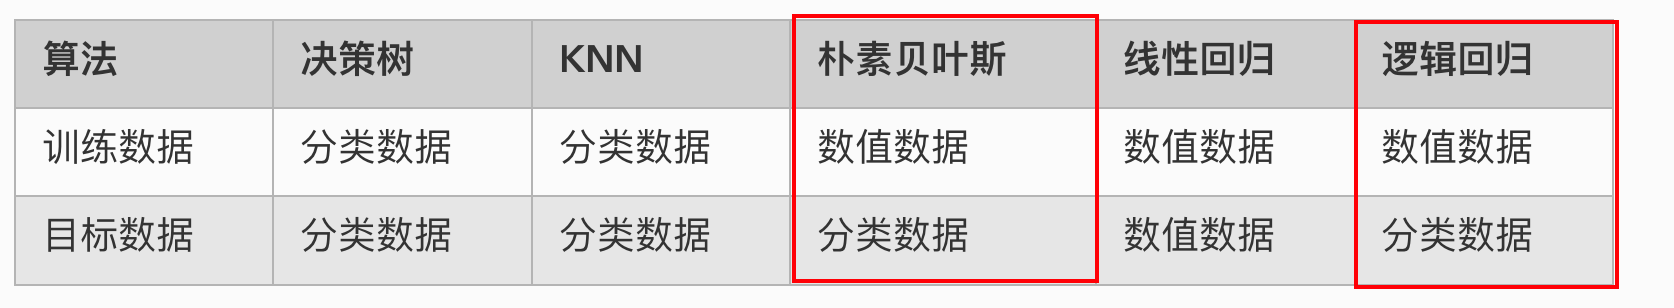

##### 从上方可以发现
- Month - 此分类特征有10种唯一值，对应10个月份
- VisitorType - 此分类特征值有3种唯一值，对应：新用户、回归用户、其他用户
- Revenue - 目标值，分为False和True两种取值。

## 4.数据分析，清洗数据

#### 替换目标值，查看各特征列与目标值的相关性

In [6]:
# 数据表格 数据替换（数字编码分类特征）
num_encode = {
    'Revenue': {False: 0, True: 1},
}
df.replace(num_encode, inplace=True)


In [7]:
data = df.drop('Revenue', inplace=False, axis=1)
data.drop('Month', inplace=True, axis=1)
# data.drop('VisitorType', inplace=True, axis=1)
target = df['Revenue']

In [8]:
# 使用独热编码 将object分类数据转换成float数值类型
data = pd.get_dummies(data)

In [9]:
# 归一化
from sklearn.preprocessing import MinMaxScaler
# 挑选最好特征值
from sklearn.feature_selection import SelectKBest
# 卡方分布
from sklearn.feature_selection import chi2
# 随机森林
from sklearn.ensemble import ExtraTreesClassifier

#### 数据归一化，方便特征值挑选

In [10]:
# 对数据归一化，大小缩小到0到1内。
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)

In [11]:
data_scaled

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.000000,0.000000,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000,0.000000,0.0,0.0,0.0,1.0
1,0.000000,0.000000,0.0,0.0,0.002837,0.001000,0.000000,0.500000,0.000000,0.0,0.142857,0.083333,0.000,0.052632,0.0,0.0,0.0,1.0
2,0.000000,0.000000,0.0,0.0,0.001418,0.000000,1.000000,1.000000,0.000000,0.0,0.428571,0.000000,1.000,0.105263,0.0,0.0,0.0,1.0
3,0.000000,0.000000,0.0,0.0,0.002837,0.000042,0.250000,0.700000,0.000000,0.0,0.285714,0.083333,0.125,0.157895,0.0,0.0,0.0,1.0
4,0.000000,0.000000,0.0,0.0,0.014184,0.009809,0.100000,0.250000,0.000000,0.0,0.285714,0.166667,0.000,0.157895,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.111111,0.042663,0.0,0.0,0.075177,0.027883,0.035714,0.145153,0.033839,0.0,0.428571,0.416667,0.000,0.000000,1.0,0.0,0.0,1.0
12326,0.000000,0.000000,0.0,0.0,0.007092,0.007280,0.000000,0.106667,0.000000,0.0,0.285714,0.083333,0.000,0.368421,1.0,0.0,0.0,1.0
12327,0.000000,0.000000,0.0,0.0,0.008511,0.002880,0.416667,0.433333,0.000000,0.0,0.285714,0.083333,0.000,0.631579,1.0,0.0,0.0,1.0
12328,0.148148,0.022067,0.0,0.0,0.021277,0.005408,0.000000,0.105263,0.000000,0.0,0.142857,0.083333,0.250,0.526316,0.0,0.0,0.0,1.0


### 4.1 特征值挑选 - 单变量选择

In [12]:
# 使用卡方检验选择topK的特征
best_features = SelectKBest(score_func=chi2, k=10).fit(data_scaled, target)
print("best_features:")
print(best_features)
print('\n')

dfscores = pd.DataFrame(best_features.scores_)
dfcolumns = pd.DataFrame(data_scaled.columns)

# concat two dataframes for better visualization 
# 合并两个数据集以获得更好的可视化效果
featureScores = pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Specs','Score']  # naming the dataframe columns 命名数据集列

print(featureScores.nlargest(10,'Score'))

best_features:
SelectKBest(k=10, score_func=<function chi2 at 0x12eb5cee0>)


                            Specs       Score
8                      PageValues  484.091655
6                     BounceRates  148.271680
7                       ExitRates  144.925360
15        VisitorType_New_Visitor  115.339482
9                      SpecialDay   53.797094
0                  Administrative   41.998723
4                  ProductRelated   27.400405
17  VisitorType_Returning_Visitor   19.183544
2                   Informational   14.915900
3          Informational_Duration   13.752302


### 4.2 特征值挑选 - 基于树的特征选择

PageValues                 0.355226
ExitRates                  0.083398
ProductRelated_Duration    0.074348
ProductRelated             0.072017
BounceRates                0.055397
Administrative             0.055249
Administrative_Duration    0.052656
TrafficType                0.047844
Region                     0.045296
Browser                    0.032592
dtype: float64

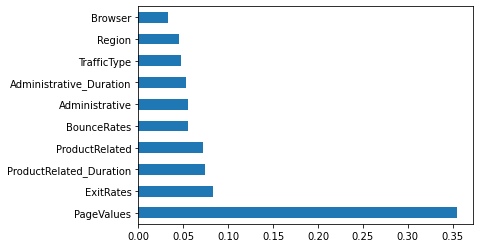

In [13]:
tree = ExtraTreesClassifier()
tree.fit(data_scaled, target)

df_feature_importances = pd.Series(tree.feature_importances_, index=data_scaled.columns)
df_feature_importances.nlargest(10).plot(kind='barh')
df_feature_importances.nlargest(10)

### 4.3 特征值挑选 - 使用相关矩阵

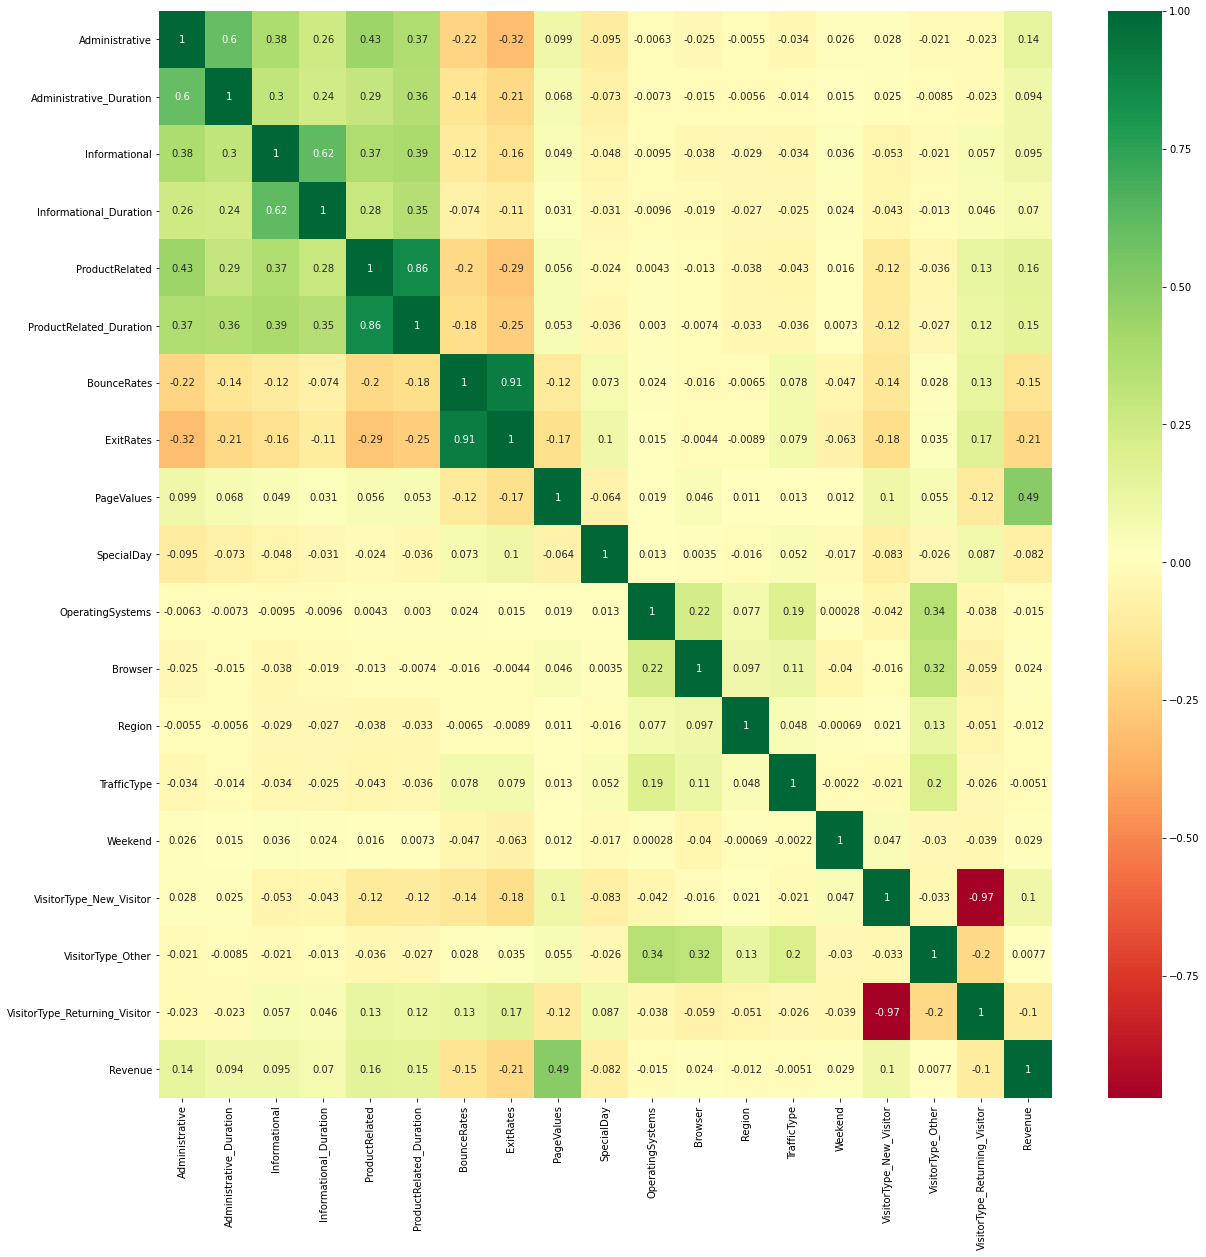

In [14]:
combine = pd.concat([data_scaled, target], axis=1)
corr_mat = combine.corr()


plt.figure(figsize=(20,20))
g=sns.heatmap(corr_mat,annot=True,cmap="RdYlGn")

In [15]:
# profile = df_encoded.profile_report(title="OSHP_report")
# profile.to_file(output_file=Path("./OSHP_report.html"))

In [16]:
X = data_scaled[['PageValues','BounceRates','ExitRates','Administrative','Administrative_Duration','ProductRelated','ProductRelated_Duration']]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PageValues               12330 non-null  float64
 1   BounceRates              12330 non-null  float64
 2   ExitRates                12330 non-null  float64
 3   Administrative           12330 non-null  float64
 4   Administrative_Duration  12330 non-null  float64
 5   ProductRelated           12330 non-null  float64
 6   ProductRelated_Duration  12330 non-null  float64
dtypes: float64(7)
memory usage: 674.4 KB


## 5.可视化输出

In [17]:
# 可视化 红色折线图 x - y
def drawRedLinePic(x, y, title, xlable, ylable):
    plt.figure(figsize=(20, 6))
    plt.plot(x, y, color='red', marker='o',
             markersize=10)
    plt.title(title)
    plt.xlabel(xlable)
    plt.ylabel(ylable)

## 6.建模、预测

In [18]:
# 切分数据集，用于训练和验证
x_train, x_test, y_train, y_test = train_test_split(X, target, test_size=0.15)

# 将max_iter值做变量，循环输出准确度
accuracy_list = []

- 逻辑回归算法

In [19]:
# 逻辑回归
def logModelAndPredict(max_iter_num):
    # 参数默认值：5
    # 生成逻辑回归模型（建模）
    log_reg = LogisticRegression(max_iter=max_iter_num)
    # 训练逻辑回归模型（训练）
    log_reg.fit(x_train, y_train)
    # 使用逻辑回归模型进行预测（预测和评估）
    pred = log_reg.predict(x_test)
    accuracy_list.append(metrics.accuracy_score(y_test, pred))

- 朴素贝叶斯算法

In [20]:
def gnbModelAndPredict():
    # 生成分类器（建模）
    gnb = GaussianNB()
    # 训练分类器（训练）
    gnb.fit(x_train, y_train)
    # 预测和评估
    pred = gnb.predict(x_test)
    print(metrics.accuracy_score(y_test, pred))

In [21]:
max_iter_num_list = []
# 逻辑回归单参数输出准确度
i = 1
while (i < 40):
    logModelAndPredict(i)
    max_iter_num_list.append(i)
    i += 1

In [22]:
# 朴素贝叶斯准确度
gnbModelAndPredict()

0.8183783783783783


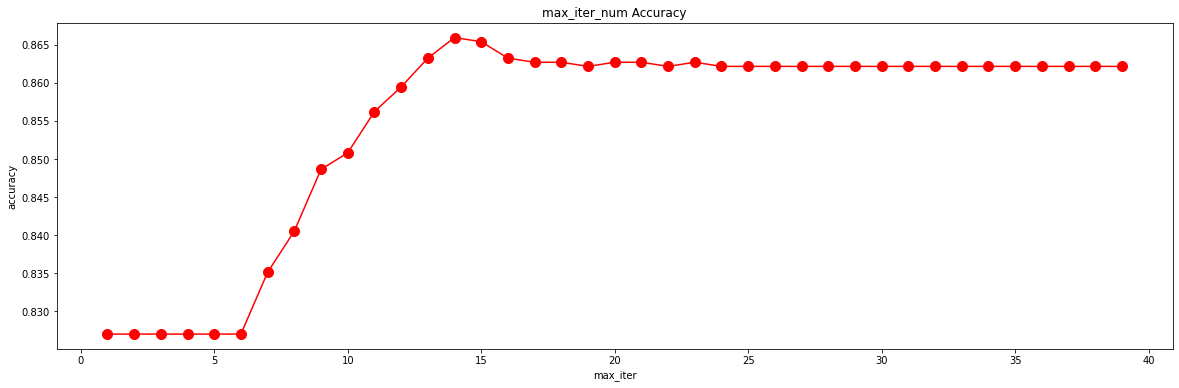

In [23]:
# 输出逻辑回归单参数准确度
drawRedLinePic(max_iter_num_list, accuracy_list, 'max_iter_num Accuracy', 'max_iter', 'accuracy')

In [24]:
result = pd.DataFrame({'max_iter_num':max_iter_num_list,'accuracy':accuracy_list})
result.sort_values(by='accuracy',inplace=True,ascending=False)
result.head()

,max_iter_num,accuracy
13,14,0.865946
14,15,0.865405
12,13,0.863243
15,16,0.863243
19,20,0.862703


### 由上可见，逻辑回归算法max_iter参数最优值为14
### 逻辑回归算法生成模型的准确度 > 朴素贝叶斯算法模型的准确度

## 7.模型评估、再训练、调优

### 7.1机器学习模型评估与性能分析
评估维度：1、定时性能；2、预测性能；3、ROC曲线；4、交叉验证

#### 7.1.1 定时性能

In [25]:
# 生成逻辑回归模型（建模）
log_reg = LogisticRegression(max_iter=14)
# 生成分类器（建模）
gnb = GaussianNB()

In [26]:
%%time
# 逻辑回归 - 训练花费时间
log_reg.fit(x_train, y_train)

CPU times: user 46.4 ms, sys: 16.9 ms, total: 63.3 ms
Wall time: 13 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=14,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
%%time
# 朴素贝叶斯 - 训练花费时间
gnb.fit(x_train, y_train)

CPU times: user 15.8 ms, sys: 5.88 ms, total: 21.7 ms
Wall time: 3.5 ms


GaussianNB(priors=None, var_smoothing=1e-09)

In [28]:
%%time
# 逻辑回归 - 预测花费时间
pred_log_reg = log_reg.predict(x_test)

CPU times: user 3.53 ms, sys: 4.13 ms, total: 7.67 ms
Wall time: 1.46 ms


In [29]:
%%time
# 朴素贝叶斯 - 预测花费时间
pred_gnb = gnb.predict(x_test)

CPU times: user 11 ms, sys: 6.43 ms, total: 17.4 ms
Wall time: 2.88 ms



- 训练时长 逻辑回归 > 朴素贝叶斯
- 预测时长 逻辑回归 < 朴素贝叶斯
### 定时性能维度 - 逻辑回归算法，训练慢，预测快。

#### 7.1.2 预测性能

In [30]:
# 引入混淆矩阵相关依赖
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

In [31]:
# 先为模型生成混淆矩阵和分类报告
confusion_matrix(y_true=y_test, y_pred=pred_log_reg)
print(classification_report(y_true=y_test, y_pred=pred_log_reg))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92      1530
           1       0.85      0.27      0.41       320

    accuracy                           0.87      1850
   macro avg       0.86      0.63      0.67      1850
weighted avg       0.86      0.87      0.84      1850



In [32]:
# 先为模型生成混淆矩阵和分类报告
confusion_matrix(y_true=y_test, y_pred=pred_gnb)
print(classification_report(y_true=y_test, y_pred=pred_gnb))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1530
           1       0.48      0.62      0.54       320

    accuracy                           0.82      1850
   macro avg       0.70      0.74      0.71      1850
weighted avg       0.84      0.82      0.83      1850



### 指标说明：
套用网上的一个例子：

某池塘有1400条鲤鱼，300只虾，300只鳖。现在以捕鲤鱼为目的。撒一大网，逮着了700条鲤鱼，200只虾，100只鳖。那么，这些指标分别如下：

精确率 = 700 / (700 +200 + 100) = 70%

召回率 = 700 / 1400 =50%

F1_score = (精确率+召回率)/2 = 50%

### 预测性能维度 - 逻辑回归算法的 平均预测准确度 优于 朴素贝叶斯

#### 7.1.3 ROC曲线

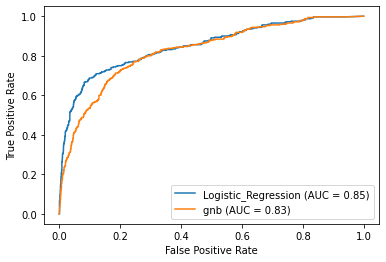

In [33]:
# 绘制两个模型的ROC曲线
ax = plt.gca()
plot_log_reg = plot_roc_curve(estimator=log_reg, X=x_test, y=y_test, ax=ax, name='Logistic_Regression')
plot_gnb = plot_roc_curve(estimator=gnb, X=x_test, y=y_test, ax=ax, name='gnb')

In [34]:
# 输出roc曲线下更精确的面积
# Area under the curve for logistic regression model: 0.9947209653092006 
pred_scores = log_reg.predict_proba(x_test)
print('Area under the curve for logistic regression model: {}'.format(roc_auc_score(y_true=y_test,
                                                                                    y_score=pred_scores[:, 1])))                                                                               

Area under the curve for logistic regression model: 0.8506076388888889


In [35]:
# 输出roc曲线下更精确的面积
# Area under the curve for KNearestNeighbours model: 0.9685143288084465
pred_scores = gnb.predict_proba(x_test)
print('Area under the curve for gnb model: {}'.format(roc_auc_score(y_true=y_test,
                                                                                   y_score=pred_scores[:, 1])))

Area under the curve for gnb model: 0.8260355392156863


### ROC曲线维度 - 逻辑回归算法 优于 朴素贝叶斯

#### 7.1.4 交叉验证

In [36]:
scores = cross_val_score(estimator=log_reg, X=x_train, y=y_train.values.ravel(), cv=10, scoring='f1_macro')
print('F1_score: %0.2f std: %0.2f'%(scores.mean(), scores.std()))

F1_score: 0.66 std: 0.02


In [37]:
scores = cross_val_score(estimator=gnb, X=x_train, y=y_train.values.ravel(), cv=10, scoring='f1_macro')
print('F1_score: %0.2f std: %0.2f'%(scores.mean(), scores.std()))

F1_score: 0.72 std: 0.02



### 交叉验证维度 - 逻辑回归算法 不足于 朴素贝叶斯

### 7.2 特征重选，调优

#### 目前选取的特征列
- PageValues 用户在完成电子商务交易之前访问的网页的平均值。
- BounceRates 从该页面进入网站然后离开的访问者百分比
- ExitRates 会话中最后一个网页的百分比
- Administrative 访问管理页的次数
- Administrative_Duration 在管理页面上花费的总时间
- ProductRelated 访问产品相关页面的次数
- ProductRelated_Duration 花费在产品相关页面上的总时间

#### 未被选取的特征列
- Informational 访问信息页的次数 👍
- Informational_Duration 在信息页上花费的总时间 👍
- SpecialDay 网站访问时间与某一特定日期（如母亲节、情人节）的接近程度。👍
- Month 月
- OperatingSystems 操作系统
- Browser 浏览器 
- Region 区域 
- TrafficType 交通类型 
- VisitorType 返回或新访客 👍
- Weekend 是否为周末 

其中挑选相关性较高的几个特征再训练模型

In [38]:
# data_scaled.info()
X = data_scaled[['PageValues','BounceRates','ExitRates','Administrative','Administrative_Duration',
                 'Informational','Informational_Duration',
                 'ProductRelated','ProductRelated_Duration','SpecialDay','VisitorType_New_Visitor',
                 'VisitorType_Other','VisitorType_Returning_Visitor']]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PageValues                     12330 non-null  float64
 1   BounceRates                    12330 non-null  float64
 2   ExitRates                      12330 non-null  float64
 3   Administrative                 12330 non-null  float64
 4   Administrative_Duration        12330 non-null  float64
 5   Informational                  12330 non-null  float64
 6   Informational_Duration         12330 non-null  float64
 7   ProductRelated                 12330 non-null  float64
 8   ProductRelated_Duration        12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  VisitorType_New_Visitor        12330 non-null  float64
 11  VisitorType_Other              12330 non-null  float64
 12  VisitorType_Returning_Visitor  12330 non-null 

In [39]:
# 切分数据集，用于训练和验证
x_train, x_test, y_train, y_test = train_test_split(X, target, test_size=0.15)

accuracy_list = []
max_iter_num_list = []
# 逻辑回归单参数输出准确度
i = 1
while (i < 40):
    logModelAndPredict(i)
    max_iter_num_list.append(i)
    i += 1

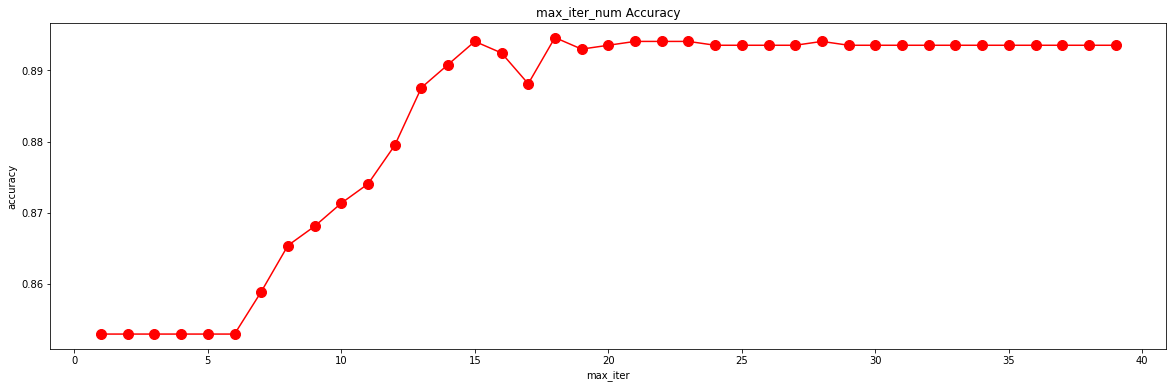

In [40]:
# 输出逻辑回归单参数准确度
drawRedLinePic(max_iter_num_list, accuracy_list, 'max_iter_num Accuracy', 'max_iter', 'accuracy')

In [41]:
result = pd.DataFrame({'max_iter_num':max_iter_num_list,'accuracy':accuracy_list})
result.sort_values(by='accuracy',inplace=True,ascending=False)
result.head()

,max_iter_num,accuracy
17,18,0.894595
20,21,0.894054
22,23,0.894054
14,15,0.894054
27,28,0.894054
